# Data Analysis

We have six datasets: 
1. Participant data
2. Participant task interaction data
3. Personality test of participants
4. Tasks
5. Post Study questionnaire data
6. Messages data

In [2]:
# Imports
import pandas as pd

## Pulling the data from Supabase

In [3]:
import csv
import requests

SUPABASE_URL = "https://vhuxlodxugpwodorwwzq.supabase.co"
SUPABASE_KEY = "sb_secret_iRWiJzUEwwbHNFA3A5LIUg_w_b9pmrh"

def export_table_to_csv(table_name: str, filename):
    """
    Export any Supabase table to a CSV file.
    
    Args:
        table_name (str): Name of the table to export.
        filename (str): Output CSV filename (defaults to <table_name>.csv).
    """
    if filename is None:
        filename = f"{table_name}.csv"

    url = f"{SUPABASE_URL}/rest/v1/{table_name}"
    headers = {
        "apikey": SUPABASE_KEY,
        "Authorization": f"Bearer {SUPABASE_KEY}",
        "Accept": "application/json"
    }

    # Fetch all rows
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        raise Exception(f"Error fetching {table_name}: {response.status_code} {response.text}")
    
    rows = response.json()
    if not rows:
        print(f"No data found in {table_name}.")
        return

    # Write to CSV
    keys = rows[0].keys()
    with open(filename, mode="w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        writer.writerows(rows)

    print(f"Exported {len(rows)} rows from '{table_name}' to {filename}")

# Example usage
export_table_to_csv("participant", 'participant.csv')      # saves to participant.csv
export_table_to_csv("task", "tasks.csv") # saves to tasks.csv
export_table_to_csv("participant_task_interaction", "participant_task_interaction.csv")
export_table_to_csv("message", "message.csv")
export_table_to_csv("personality_test", "personality_test.csv")
export_table_to_csv("post_study_questions", "post_study_questions.csv")

Exported 63 rows from 'participant' to participant.csv
Exported 11 rows from 'task' to tasks.csv
Exported 488 rows from 'participant_task_interaction' to participant_task_interaction.csv
Exported 976 rows from 'message' to message.csv
Exported 68 rows from 'personality_test' to personality_test.csv
Exported 27 rows from 'post_study_questions' to post_study_questions.csv


## Participants Data Cleaning

In [4]:
participant = pd.read_csv('participant.csv')
participant = participant.drop(columns=['password'], axis=1)
participant.head()


,id,created_at,name,email,age,gender,education,occupation,nationality,frequency_usage,english_fluency,ai_usage,consent,familiarity
0,1,2025-08-11T16:39:58.335908+00:00,Shajia Mithani,shajia.mithani@gmail.com,28,female,university,social,pakistan,multiple-times,fluent-c1,"[{'label': 'Teaching', 'value': 'teaching'}]",True,"{'1': True, '2': True, '3': True, '4': False, ..."
1,2,2025-08-11T16:54:37.71803+00:00,Tauqeer Ahmed Iqbal Ahmed Shaikh,tauqeer.shaikh@stud.fra-uas.de,24,male,university,computing,india,constantly,fluent-c1,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,"{'1': True, '2': True, '3': True, '4': True, '..."
2,3,2025-08-11T17:10:42.112849+00:00,Hamza Asaad,hamza.asaad@stud.fra-uas.de,26,male,university,computing,pakistan,always,fluent-c1,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,"{'1': True, '2': False, '3': False, '4': False..."
3,4,2025-08-11T17:26:05.462118+00:00,rafia Basheer,rafia.ahamed-basheer@stud.fra-uas.de,33,female,university,engineering,india,often,intermediate-b2,"[{'label': 'Learning / Studying', 'value': 'le...",True,"{'1': True, '2': True, '3': True, '4': True, '..."
4,5,2025-08-11T18:52:21.661286+00:00,Adesh Shirke,adesh.shirke@stud.fra-uas.de,27,male,post-secondary,engineering,india,always,fluent-c1,"[{'label': 'Research / Information Gathering',...",True,"{'1': True, '2': False, '3': False, '4': False..."


In [5]:
print("total females:", participant.loc[participant['gender'] == 'female'].reset_index(drop=True).__len__())
print("total males:", participant.loc[participant['gender'] == 'male'].reset_index(drop=True).__len__())
print('Both includes duplicates')

total females: 15
total males: 48
Both includes duplicates


### Handling deduplication

In [6]:
participant['email'] = participant['email'].str.lower().str.strip()
participant['name'] = participant['name'].str.lower().str.strip()

print(participant["name"].value_counts()[participant["name"].value_counts() > 1].__len__())
print(participant["email"].value_counts()[participant["email"].value_counts() > 1].__len__())

11
12


As some participants attempted the study more than once, we will still consider their prompts so we will merge them after we have imported and cleaned all the other datasets.

## Participant Task Interaction

In [7]:
participant_task_interaction = pd.read_csv('participant_task_interaction.csv')
participant_task_interaction.head()


,id,started_at,ended_at,ai_tool,participant_id,task_id
0,1,2025-08-11T16:43:46.321746+00:00,2025-08-11T16:43:46.588334+00:00,GPT-4o,1,1
1,2,2025-08-11T16:47:04.536261+00:00,NaN,GPT-4o,1,2
2,4,2025-08-11T16:48:39.841189+00:00,NaN,GPT-4o,1,3
3,5,2025-08-11T16:49:07.215491+00:00,NaN,GPT-4o,1,3
4,3,2025-08-11T16:48:15.553518+00:00,2025-08-11T16:49:21.11072+00:00,GPT-4o,1,3


## Messages

In [8]:
message = pd.read_csv('message.csv')
message.tail()

,id,created_at,interaction_id,sender,content
971,972,2025-08-26T11:10:00.855+00:00,486,ai,/static/images/image_20250826_111130_255386_79...
972,973,2025-08-26T11:10:11.612+00:00,487,user,this is not me
973,974,2025-08-26T11:10:30.887+00:00,487,ai,/static/images/image_20250826_111200_270498_9e...
974,975,2025-08-26T11:11:04.698+00:00,488,user,I have a master bedroom and its all scattered ...
975,976,2025-08-26T11:11:22.296+00:00,488,ai,/static/images/image_20250826_111251_730675_f4...


In [9]:
task = pd.read_csv('tasks.csv')
task.head()

,id,description,task_type,category,title
0,1,Describe one of your favorite moments from you...,image,Image Generation,Visualize a memory from your last vacation.
1,2,You recently moved into a new room and are see...,image,Image Generation,Design your room
2,3,Start by telling the AI about your roommates (...,text,Brainstorming,You share an apartment and want help dividing ...
3,4,"Describe your friend to the AI — personality, ...",text,Brainstorming,Buy a thoughtful birthday gift for your best f...
4,5,"Share your fitness goals, dietary preferences,...",text,Planning,Build a weekly fitness and meal plan tailored ...


## Handling Duplication

Merging across the datasets.

In [10]:
import numpy as np

# Step 1: normalize email
participant["email_norm"] = participant["email"].str.strip().str.lower()

# Step 2: build dedupe key
participant["dedupe_key"] = np.where(
    participant["email_norm"].notna(),
    participant["email_norm"],
    participant["name"].str.strip().str.lower() + "_" +
    participant["age"].astype(str) + "_" +
    participant["nationality"].str.strip().str.lower()
)

# Step 3: sort and pick a canonical row for each dedupe_key
participants_sorted = participant.sort_values("created_at")
canonical = participants_sorted.drop_duplicates(subset=["dedupe_key"], keep="first")

# Step 4: map ALL old_ids to the canonical_id
id_map = {}
for key, group in participants_sorted.groupby("dedupe_key"):
    canonical_id = group.iloc[0]["id"]   # pick the first submission
    for pid in group["id"]:
        id_map[pid] = canonical_id

# Step 5: reassign interactions to canonical participant_id
participant_task_interaction["participant_id"] = participant_task_interaction["participant_id"].map(id_map)

# Step 6: now canonical is your deduplicated participant table
deduped = canonical.copy()

# Step 7: balance genders
male_df = deduped[deduped["gender"].str.lower() == "male"]
female_df = deduped[deduped["gender"].str.lower() == "female"]

n_females = len(female_df)
balanced_male_df = male_df.sample(n=n_females, random_state=42)

final_participants = pd.concat([balanced_male_df, female_df], ignore_index=True)
final_participants = final_participants.sample(frac=1, random_state=42).reset_index(drop=True)

print(final_participants["gender"].value_counts())


gender
male      11
female    11
Name: count, dtype: int64


In [11]:
final_participants.__len__()



22

# Analysis

Data restructuring

In [12]:
# Merge PTI with message
merged_df = participant_task_interaction.merge(
    message,
    left_on="id",          
    right_on="interaction_id",  
    how="inner"
)

# Merge with task
merged_df = merged_df.merge(
    task,
    left_on="task_id",
    right_on="id",
    how="inner",
    suffixes=("", "_task")
)

# Merge with participant (to bring gender + any other attributes)
merged_df = merged_df.merge(
    final_participants,
    left_on="participant_id",
    right_on="id",
    how="inner",
    suffixes=("", "_participant")
)

# Sort for chronological conversations
merged_df = merged_df.sort_values(by=["participant_id", "task_id", "created_at"])

# Group conversations per participant/task, but now gender is also available
grouped_conversations = (
    merged_df.groupby(["participant_id", "gender", "task_id"])
    .apply(lambda x: [
        {"sender": row["sender"], "content": row["content"], "created_at": row["created_at"]}
        for _, row in x.iterrows()
    ])
    .reset_index(name="conversation")
)

# grouped_conversations.to_csv('./data/grouped_conversations.csv', index=False)



C:\Users\human\AppData\Local\Temp\ipykernel_52860\1365536167.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: [


### N by gender

In [13]:
merged_df.groupby('gender').count()['content']

gender
female    108
male      306
Name: content, dtype: int64

# Dependent Variables

## Prompt Length

In [14]:
def prompt_length(conv):
    return [len(msg["content"].split()) for msg in conv if msg["sender"] == "user"][0]


In [15]:
grouped_conversations["prompt_length"] = grouped_conversations["conversation"].apply(prompt_length)
prompt_lengths = grouped_conversations[['gender', 'prompt_length']]

In [16]:
prompt_lengths.head()

,gender,prompt_length
0,female,21
1,female,35
2,female,9
3,female,15
4,female,7


In [17]:
prompt_lengths.groupby('gender').mean()

,prompt_length
gender,
female,36.185185
male,31.440000


## Vocabular Variety (TTR)

In [18]:
def ttr(conv):
    '''Distinct Words Ratio'''
    texts = [msg["content"] for msg in conv if msg["sender"] == "user"]
    words = " ".join(texts).split()
    return len(set(words)) / len(words) if words else 0


In [19]:
grouped_conversations["ttr"] = grouped_conversations["conversation"].apply(ttr)
ttr = grouped_conversations[['gender', 'ttr']]

In [20]:
ttr.head()

,gender,ttr
0,female,0.904762
1,female,0.914286
2,female,0.833333
3,female,1.000000
4,female,0.935484


In [21]:
ttr.groupby('gender').mean()

,ttr
gender,
female,0.782036
male,0.798651


## Emotion and Judgement Words

In [22]:

# Load NRC Emotion Lexicon
lexicon = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", 
                      names=["word", "emotion", "association"], 
                      sep="\t")

# Keep only associations where association == 1
lexicon = lexicon[lexicon["association"] == 1]

# Convert to dictionary: {word: [emotions]}
emotion_words = {}
for _, row in lexicon.iterrows():
    emotion_words.setdefault(row["word"], []).append(row["emotion"])

print(emotion_words)

def emotion_counts(conv):
    counts = {
        "anger": 0, "anticipation": 0, "disgust": 0, "fear": 0,
        "joy": 0, "negative": 0, "positive": 0, "sadness": 0,
        "surprise": 0, "trust": 0
    }
    for msg in conv:
        if msg["sender"] == "user":   # or "participant" depending on your mapping
            for w in msg["content"].lower().split():
                if w in emotion_words:
                    for emo in emotion_words[w]:
                        counts[emo] += 1
    return counts



{'abacus': ['trust'], 'abandon': ['fear', 'negative', 'sadness'], 'abandoned': ['anger', 'fear', 'negative', 'sadness'], 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'], 'abba': ['positive'], 'abbot': ['trust'], 'abduction': ['fear', 'negative', 'sadness', 'surprise'], 'aberrant': ['negative'], 'aberration': ['disgust', 'negative'], 'abhor': ['anger', 'disgust', 'fear', 'negative'], 'abhorrent': ['anger', 'disgust', 'fear', 'negative'], 'ability': ['positive'], 'abject': ['disgust', 'negative'], 'abnormal': ['disgust', 'negative'], 'abolish': ['anger', 'negative'], 'abolition': ['negative'], 'abominable': ['disgust', 'fear', 'negative'], 'abomination': ['anger', 'disgust', 'fear', 'negative'], 'abort': ['negative'], 'abortion': ['disgust', 'fear', 'negative', 'sadness'], 'abortive': ['negative', 'sadness'], 'abovementioned': ['positive'], 'abrasion': ['negative'], 'abrogate': ['negative'], 'abrupt': ['surprise'], 'abscess': ['negative', 'sadness'], 'absence': ['fear

In [23]:
grouped_conversations["emotion_counts"] = grouped_conversations["conversation"].apply(emotion_counts)
emotion_counts = grouped_conversations[['gender', 'emotion_counts']]

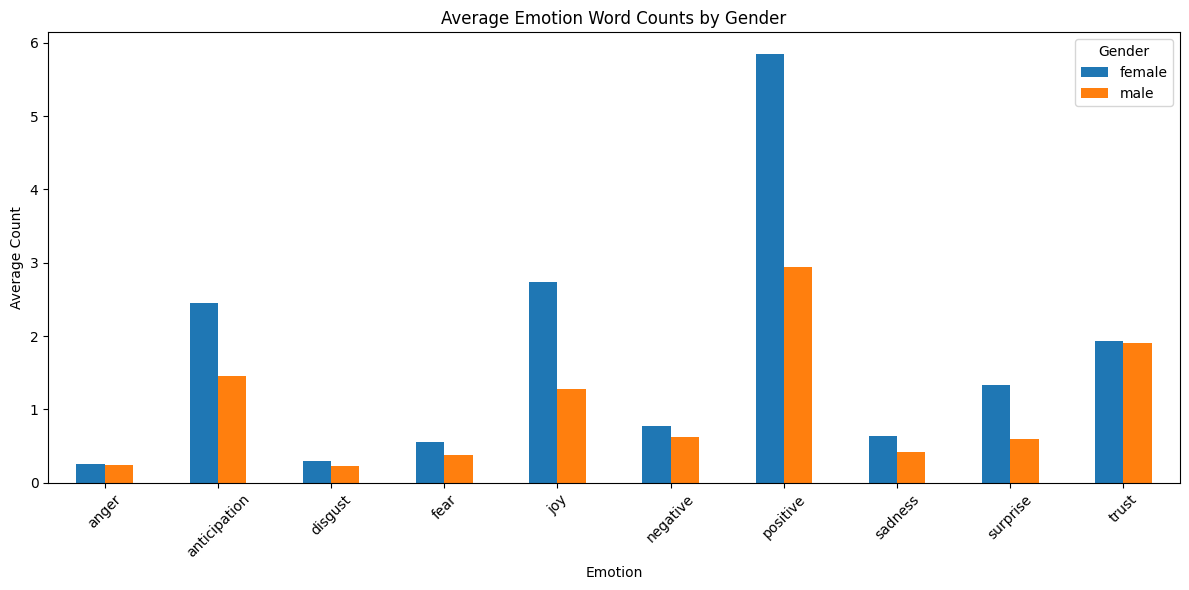

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

emotions_df = pd.json_normalize(emotion_counts['emotion_counts'])

# Merge with gender
df_expanded = pd.concat([emotion_counts['gender'], emotions_df], axis=1)

# Compute mean emotion counts by gender
mean_emotions = df_expanded.groupby("gender").mean()

# Plot
mean_emotions.T.plot(kind="bar", figsize=(12,6))
plt.title("Average Emotion Word Counts by Gender")
plt.ylabel("Average Count")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

## Pronoun Usage

In [25]:
pronouns = {
    "first": {"i","me","my","we","us","our"},
    "second": {"you","your","yours"},
    "third": {"he","she","they","it","them","his","her","their"}
}

def pronoun_usage(conv):
    counts = {"first": 0, "second": 0, "third": 0}
    total = 0
    for msg in conv:
        if msg["sender"] == "user":
            words = msg["content"].lower().split()
            total += len(words)
            for w in words:
                for p in pronouns:
                    if w in pronouns[p]:
                        counts[p] += 1
    return {k: v/total if total else 0 for k,v in counts.items()}


In [26]:
grouped_conversations["pronoun_usage"] = grouped_conversations["conversation"].apply(pronoun_usage)
pronoun_usage = grouped_conversations[['gender', 'pronoun_usage']]

In [27]:
pronoun_usage.head()

,gender,pronoun_usage
0,female,"{'first': 0.0, 'second': 0.0, 'third': 0.04761..."
1,female,"{'first': 0.0, 'second': 0.0, 'third': 0.0}"
2,female,"{'first': 0.16666666666666666, 'second': 0.0, ..."
3,female,"{'first': 0.13333333333333333, 'second': 0.0, ..."
4,female,"{'first': 0.0967741935483871, 'second': 0.0, '..."


In [28]:
# expand the dicts in pronoun_usage into columns
expanded = pd.json_normalize(pronoun_usage['pronoun_usage'])

# join gender with expanded values
df_expanded = pd.concat([pronoun_usage['gender'], expanded], axis=1)

df_expanded.groupby('gender')[['first', 'second', 'third']].mean()

,first,second,third
gender,,,
female,0.075454,0.003605,0.026331
male,0.055738,0.005444,0.024676


## Sentence Length

In [29]:
import nltk
# Only need to do this once; run separately, not inside main loop
nltk.download("punkt")
nltk.download("punkt_tab")  # sometimes required in new nltk versions

def avg_sentence_length(conv):
    lengths = []
    for msg in conv:
        if msg["sender"] == "user":
            sentences = nltk.sent_tokenize(msg["content"])
            for s in sentences:
                lengths.append(len(s.split()))
    return sum(lengths)/len(lengths) if lengths else 0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\human\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\human\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [30]:
grouped_conversations["sentence_length"] = grouped_conversations["conversation"].apply(avg_sentence_length)
sentence_length = grouped_conversations[['gender', 'sentence_length']]

In [31]:
sentence_length.head()

,gender,sentence_length
0,female,21.000000
1,female,7.000000
2,female,8.000000
3,female,7.500000
4,female,4.428571


In [32]:
sentence_length.groupby("gender").mean().reset_index()

,gender,sentence_length
0,female,10.430562
1,male,14.089811


## Sentence Count

In [33]:
def sentence_count(conv):
    return sum(len(nltk.sent_tokenize(msg["content"])) for msg in conv if msg["sender"]=="user")


In [34]:
grouped_conversations["sentence_count"] = grouped_conversations["conversation"].apply(sentence_count)
sentence_counts = grouped_conversations[['gender', 'sentence_count']]
sentence_counts.head()

,gender,sentence_count
0,female,1
1,female,5
2,female,3
3,female,2
4,female,7


In [35]:
sentence_counts.groupby("gender").mean().reset_index()

,gender,sentence_count
0,female,6.481481
1,male,4.480000


## Phatic Expressions

In [36]:
phatic = {"hi","hello","thanks","thank you","bye"}

def contains_phatic(conv):
    return any(any(word in msg["content"].lower() for word in phatic) 
               for msg in conv if msg["sender"]=="user")


In [37]:
grouped_conversations["phatic_expressions"] = grouped_conversations["conversation"].apply(contains_phatic)
phatic_expressions = grouped_conversations[['gender', 'phatic_expressions']]
phatic_expressions.head()

,gender,phatic_expressions
0,female,True
1,female,True
2,female,True
3,female,False
4,female,True


In [38]:
phatic_expressions.groupby("gender").mean().reset_index()

,gender,phatic_expressions
0,female,0.555556
1,male,0.500000


## Opinions (Subjectivity)

In [39]:
from textblob import TextBlob

def opinion_score(conv):
    texts = " ".join(msg["content"] for msg in conv if msg["sender"]=="user")
    return TextBlob(texts).sentiment.subjectivity if texts else 0


In [40]:
grouped_conversations["opinion_score"] = grouped_conversations["conversation"].apply(opinion_score)
opinion_scores = grouped_conversations[['gender', 'opinion_score']]
opinion_scores.head()

,gender,opinion_score
0,female,0.390000
1,female,0.241667
2,female,0.687500
3,female,1.000000
4,female,0.525983


In [41]:
opinion_scores.groupby("gender").mean().reset_index()

,gender,opinion_score
0,female,0.438426
1,male,0.386037


## Sentiment Score

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment(conv):
    texts = " ".join(msg["content"] for msg in conv if msg["sender"]=="user")
    return analyzer.polarity_scores(texts)["compound"] if texts else 0


In [43]:
grouped_conversations["sentiment"] = grouped_conversations["conversation"].apply(sentiment)
sentiment_scores = grouped_conversations[['gender', 'sentiment']]
sentiment_scores.head()

,gender,sentiment
0,female,-0.3384
1,female,0.3612
2,female,0.0772
3,female,0.8225
4,female,0.6397


In [44]:
sentiment_scores.groupby("gender").mean().reset_index()

,gender,sentiment
0,female,0.644556
1,male,0.394400


## Iteration Count

In [45]:
def iteration_count(conv):
    return sum(1 for msg in conv if msg["sender"]=="user")


In [46]:
grouped_conversations["iteration_count"] = grouped_conversations["conversation"].apply(iteration_count)
iteration_counts = grouped_conversations[['gender', 'iteration_count']]
iteration_counts.head() 

,gender,iteration_count
0,female,1
1,female,1
2,female,3
3,female,1
4,female,2


In [47]:
iteration_counts.groupby("gender").mean().reset_index()

,gender,iteration_count
0,female,2.00
1,male,3.06


# Hypotheses

## Hypothesis a:
H1a. Female users are expected to use a higher frequency of emotion-laden vocabulary (e.g., emotion words, tentative expressions, and uncertain verbs), along with greater pronoun usage and phatic expressions, reflecting a more interpersonally-oriented and emotionally expressive style.

H0a. There will be no significant difference between prompts submitted by male and female users in terms of their lexical, syntactic, pragmatic, or interactional linguistic features.

### DVs to consider:
1. Vocabulary variety (TTR) 
2. Emotion and Judgement Words using NRC Emotion Lexicon file
3. Pronoun Usage
4. Phatic expressions
5. Opinions subjectivity using textblob
6. Sentiment score using SentimentIntensityAnalyzer

Since this is a group difference test, we compare distribution of DVs between male and female.
1. If DV is normal in both groups (and variances are homogeneous) → use t-test (parametric).
2. If DV is not normal in at least one group → use Mann–Whitney U test (nonparametric alternative to independent t-test).

In [48]:
grouped_conversations['ttr'] = ttr['ttr']
grouped_conversations['emotion_counts'] = emotion_counts['emotion_counts']
grouped_conversations['pronoun_usage'] = pronoun_usage['pronoun_usage']
grouped_conversations['phatic_expressions'] = phatic_expressions['phatic_expressions']
grouped_conversations['opinion_score'] = opinion_scores['opinion_score']
grouped_conversations['sentiment'] = sentiment_scores['sentiment']
grouped_conversations.head()




,participant_id,gender,task_id,conversation,prompt_length,ttr,emotion_counts,pronoun_usage,sentence_length,sentence_count,phatic_expressions,opinion_score,sentiment,iteration_count
0,1,female,1,"[{'sender': 'user', 'content': 'standing on th...",21,0.904762,"{'anger': 1, 'anticipation': 0, 'disgust': 1, ...","{'first': 0.0, 'second': 0.0, 'third': 0.04761...",21.000000,1,True,0.390000,-0.3384,1
1,1,female,2,"[{'sender': 'user', 'content': 'cream coloured...",35,0.914286,"{'anger': 1, 'anticipation': 1, 'disgust': 1, ...","{'first': 0.0, 'second': 0.0, 'third': 0.0}",7.000000,5,True,0.241667,0.3612,1
2,1,female,3,"[{'sender': 'user', 'content': 'i do the clean...",9,0.833333,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ...","{'first': 0.16666666666666666, 'second': 0.0, ...",8.000000,3,True,0.687500,0.0772,3
3,1,female,4,"[{'sender': 'user', 'content': 'i have gifted ...",15,1.000000,"{'anger': 0, 'anticipation': 1, 'disgust': 0, ...","{'first': 0.13333333333333333, 'second': 0.0, ...",7.500000,2,False,1.000000,0.8225,1
4,1,female,5,"[{'sender': 'user', 'content': 'yes help me ma...",7,0.935484,"{'anger': 0, 'anticipation': 2, 'disgust': 0, ...","{'first': 0.0967741935483871, 'second': 0.0, '...",4.428571,7,True,0.525983,0.6397,2


In [49]:
import pandas as pd
from scipy.stats import shapiro

# assume df is already loaded

# Expand dict columns into multiple columns
emotion_df = pd.json_normalize(grouped_conversations['emotion_counts'])
pronoun_df = pd.json_normalize(grouped_conversations['pronoun_usage'])

# Rename columns with prefixes
emotion_df = emotion_df.add_prefix('emo_')
pronoun_df = pronoun_df.add_prefix('pron_')

# Concatenate back to df
grouped_conversations = pd.concat([grouped_conversations.drop(['emotion_counts', 'pronoun_usage'], axis=1),
                emotion_df, pronoun_df], axis=1)

# Now your DVs are numeric columns:
dvs = ['ttr', 'emo_anger', 'emo_anticipation', 'emo_disgust', 
       'emo_fear', 'emo_joy', 'emo_sadness', 'emo_surprise', 
       'emo_trust',
       'pron_first', 'pron_second', 'pron_third',
       'opinion_score', 'sentiment']

# Run Shapiro-Wilk per DV per gender
results = {}

for dv in dvs:
    results[dv] = {}
    for group in grouped_conversations['gender'].unique():
        data = grouped_conversations[grouped_conversations['gender'] == group][dv].dropna()
        if len(data) >= 3:  # Shapiro requires at least 3 samples
            stat, p = shapiro(data)
            results[dv][group] = {"W": stat, "p-value": p}
        else:
            results[dv][group] = {"W": None, "p-value": None}

# Print results
for dv, groups in results.items():
    print(f"\nDV: {dv}")
    for group, res in groups.items():
        print(f"  {group}: W={res['W']}, p={res['p-value']}")



DV: ttr
  female: W=0.8551820229678535, p=0.0014611419301172172
  male: W=0.9640716847678001, p=0.13164332630064407

DV: emo_anger
  female: W=0.5487346249985008, p=5.46567442318046e-08
  male: W=0.39971523435698253, p=5.246272895262833e-13

DV: emo_anticipation
  female: W=0.6723837341762338, p=1.637697914877466e-06
  male: W=0.7870115048381598, p=4.458953615125458e-07

DV: emo_disgust
  female: W=0.5441829027660465, p=4.8800488363680005e-08
  male: W=0.48633504332617294, p=5.5466660154482385e-12

DV: emo_fear
  female: W=0.5013540880298206, p=1.73787604698605e-08
  male: W=0.5663062756150014, p=6.353323875795492e-11

DV: emo_joy
  female: W=0.7650211209800466, p=3.5928596873954706e-05
  male: W=0.7320781186081295, p=3.2681133683984074e-08

DV: emo_sadness
  female: W=0.5229141393188312, p=2.9007338581985626e-08
  male: W=0.6403490544082595, p=8.127104730434576e-10

DV: emo_surprise
  female: W=0.5931462849525799, p=1.7189953860342544e-07
  male: W=0.6597177922081288, p=1.67615955358

## Hypothesis b:
H1b: Male prompts may contain fewer and shorter sentences, indicating a more direct approach.

H0b: There will be no significant gender-based differences in sentence structure.

### Dependent Variables
For Hypothesis B, the relevant dependent variables are measures of sentence structure:
- **Sentence Count**: the number of sentences per prompt.  
- **Average Sentence Length**: the average number of words per sentence.

In [54]:
# Define DVs for Hypothesis B (sentence structure measures)
sentence_dvs = ['sentence_count', 'sentence_length']

# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_conversations['gender'].unique()):
        # Extract data for this gender group
        data = grouped_conversations[grouped_conversations['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: sentence_count
----------------------------------------
  Female: W = 0.7189, p = 0.000007 (n=27)
    Male: W = 0.9046, p = 0.000683 (n=50)

DV: sentence_length
----------------------------------------
  Female: W = 0.9255, p = 0.053525 (n=27)
    Male: W = 0.7503, p = 0.000000 (n=50)


### Hypothesis B – Normality Results

- **Sentence count:** Both female (p < .001) and male (p < .001) groups are significantly non-normal.  
- **Sentence length:** Female prompts are approximately normal (p = .054), but male prompts are strongly non-normal (p < .001).  

Since the assumption of normality is violated for both DVs, we will use the **Mann–Whitney U test** (nonparametric) to compare sentence structure between male and female prompts.

In [56]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(dv):
    print(f"\n=== {dv} ===")
    
    male_vals = grouped_conversations[grouped_conversations["gender"] == "male"][dv].dropna()
    female_vals = grouped_conversations[grouped_conversations["gender"] == "female"][dv].dropna()
    
    # Run Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(male_vals, female_vals, alternative="two-sided")
    
    # Rank-biserial correlation (effect size)
    n1, n2 = len(male_vals), len(female_vals)
    rbc = 1 - (2 * u_stat) / (n1 * n2)   # formula for rank-biserial correlation
    
    print(f"U statistic = {u_stat}")
    print(f"p-value = {p_val:.6f}")
    print(f"Effect size (Rank-Biserial r) = {rbc:.3f}")
    print(f"Median (Male) = {male_vals.median():.2f}, Median (Female) = {female_vals.median():.2f}")
    print(f"Mean (Male) = {male_vals.mean():.2f}, Mean (Female) = {female_vals.mean():.2f}")

# Run tests for Hypothesis B
mann_whitney_test("sentence_count")
mann_whitney_test("sentence_length")


=== sentence_count ===
U statistic = 562.0
p-value = 0.226075
Effect size (Rank-Biserial r) = 0.167
Median (Male) = 4.00, Median (Female) = 5.00
Mean (Male) = 4.48, Mean (Female) = 6.48

=== sentence_length ===
U statistic = 865.5
p-value = 0.042495
Effect size (Rank-Biserial r) = -0.282
Median (Male) = 12.06, Median (Female) = 9.25
Mean (Male) = 14.09, Mean (Female) = 10.43


### Results

#### Sentence Count
- Female prompts have a slightly higher median sentence count (Median = 5) compared to male prompts (Median = 4).  
- This difference is **not statistically significant** (Mann–Whitney U = 562.0, p = .226, r = .167).  
- Hence, there is no evidence that males use **fewer sentences** than females.

#### Sentence Length
- Male prompts have a significantly higher median average sentence length (Median = 12.06 words) compared to female prompts (Median = 9.25 words).  
- This difference is **statistically significant** (Mann–Whitney U = 865.5, p = .043, r = –.282).  
- Contrary to H1b, male prompts contain **longer sentences**, while female prompts use shorter sentence structures.

#### Conclusion
- **Sentence Count:** No significant difference.  
- **Sentence Length:** Significant difference, but in the **opposite direction** of H1b.  
- Overall, Hypothesis B is **not supported**: men do not write fewer and shorter sentences; instead, they write sentences that are significantly longer on average.


## Hypothesis D

**H1d:** Women engage in more iterative refinement or clarification.  
**H0d:** There is no significant gender difference in the number of iterations until an acceptable answer.

### Dependent Variable
- **Iteration Count**: the number of user turns within a participant–task interaction (i.e., how many times a participant refines the prompt before completion).

In [57]:
# Define DVs for Hypothesis B (sentence structure measures)
sentence_dvs = ['iteration_count']

# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_conversations['gender'].unique()):
        # Extract data for this gender group
        data = grouped_conversations[grouped_conversations['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: iteration_count
----------------------------------------
  Female: W = 0.7585, p = 0.000028 (n=27)
    Male: W = 0.8723, p = 0.000066 (n=50)


### Hypothesis B – Normality Results

- **Iteration Count:** Both female (p < .001) and male (p < .001) groups are significantly non-normal.  

Since the assumption of normality is violated , we will use the **Mann–Whitney U test** (nonparametric) to compare the iteration count between male and female prompts.

In [58]:
mann_whitney_test("iteration_count")


=== iteration_count ===
U statistic = 929.0
p-value = 0.005409
Effect size (Rank-Biserial r) = -0.376
Median (Male) = 3.00, Median (Female) = 1.00
Mean (Male) = 3.06, Mean (Female) = 2.00


### Results

#### Iteration Count
- Male prompts have a higher median iteration count (Median = 3, Mean = 3.06) compared to female prompts (Median = 1, Mean = 2.00).  
- This difference is **statistically significant** (Mann–Whitney U = 929.0, p = .005, r = –.376).  
- Males engage in **more iterative refinement** than females, contradicting H1d.

#### Conclusion
Hypothesis D is **not supported**. The results indicate that men, not women, perform significantly more iterations before reaching a satisfactory response.
